In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D,Flatten,Dropout,Dense
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.metrics import Accuracy,Precision , Recall
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
import numpy as np
import os
import matplotlib.pyplot as plt

In [3]:
model = Sequential()
model.add(Conv2D(256,9,input_shape=(512,512,1),activation= 'relu',padding='same',strides=2))
model.add(Conv2D(128,3,activation= 'relu',padding='same',strides=2))
model.add(Dropout(0.3))
model.add(Conv2D(64,3,activation= 'relu',padding='same',strides=2))
model.add(Conv2D(32,3,activation= 'relu',padding='same',strides=2))
model.add(Dropout(0.3))
model.add(Conv2D(16,3,activation= 'relu',padding='same',strides=2))
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(25,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 256)     20992     
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 128)     295040    
                                                                 
 dropout (Dropout)           (None, 128, 128, 128)     0         
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        73792     
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 dropout_1 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 16)        4

In [5]:
def get_tensor(path):
    images_liste = os.listdir(path)
    Nb_images = len(images_liste)
    tenseur = np.empty((Nb_images, 512, 512, 1))

    for i,file in enumerate(images_liste):
        print(i)
        img = np.load(os.path.join(path,file))
        tenseur[i, :, :, 0] = img
    return tenseur


In [6]:
X0 = get_tensor("D:/fin_de_etude/data/dataset_2d/nonnodule/")
X1 = get_tensor("D:/fin_de_etude/data/dataset_2d/nodule/")


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135


In [7]:
print(X0.shape)

print(X1[0].shape)

(169, 512, 512, 1)
(512, 512, 1)


In [8]:
X = np.concatenate((X0,X1),axis=0
                   
                   )

In [9]:
Y0 = []
Y1 = []
for i in range(X0.shape[0]):
    Y0.append(0)
for i in range(X1.shape[0]):
    Y1.append(1)
Y0 = np.asarray(Y0)
Y1 = np.asarray(Y1)
Y = np.concatenate((Y0,Y1))


In [10]:
np.save("X.npy",X)
np.save("Y.npy",Y)

In [11]:
X = (X-np.min(X))/(np.max(X)-np.min(X))

In [12]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size =0.4,random_state=48)

In [13]:
print(Ytrain)
print(Ytest)

[1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1
 0 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0
 0 1 0 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1
 1 1 0 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1
 1 1 0 1 0 1 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 1 0 1
 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 

In [14]:
model.compile(optimizer = SGD(),loss = BinaryCrossentropy(),metrics=["accuracy",Precision(),Recall()])

In [15]:
H = model.fit(Xtrain,Ytrain,epochs=20,batch_size=4,validation_split=0.2)

Epoch 1/20
107/107 [==============================] - 31s 235ms/step - loss: 0.6162 - accuracy: 0.7757 - precision: 0.7849 - recall: 0.9852 - val_loss: 0.4264 - val_accuracy: 0.8879 - val_precision: 0.8879 - val_recall: 1.0000
Epoch 2/20
107/107 [==============================] - 24s 222ms/step - loss: 0.5707 - accuracy: 0.7874 - precision: 0.7874 - recall: 1.0000 - val_loss: 0.4569 - val_accuracy: 0.8879 - val_precision: 0.8879 - val_recall: 1.0000
Epoch 3/20
107/107 [==============================] - 24s 223ms/step - loss: 0.5538 - accuracy: 0.7874 - precision: 0.7874 - recall: 1.0000 - val_loss: 0.4647 - val_accuracy: 0.8879 - val_precision: 0.8879 - val_recall: 1.0000
Epoch 4/20
107/107 [==============================] - 24s 223ms/step - loss: 0.5370 - accuracy: 0.7874 - precision: 0.7874 - recall: 1.0000 - val_loss: 0.3606 - val_accuracy: 0.8879 - val_precision: 0.8879 - val_recall: 1.0000
Epoch 5/20
107/107 [==============================] - 24s 224ms/step - loss: 0.5526 - accura

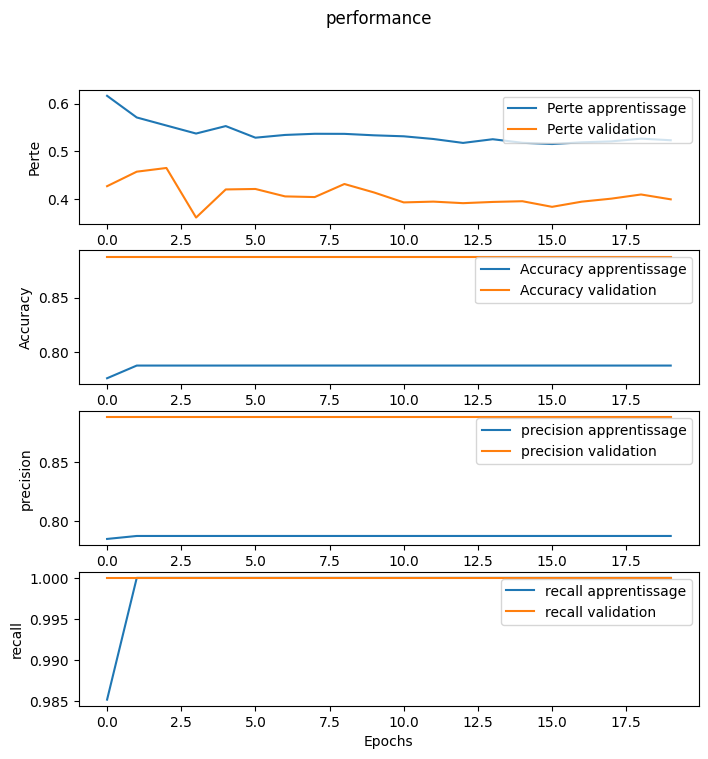

In [28]:
plt.figure(1, figsize=(8, 8))
plt.suptitle("performance") 
plt.subplot(4, 1, 1)
plt.plot(np.arange(0, 20), H.history["loss"], label="Perte apprentissage")
plt.plot(np.arange(0, 20), H.history["val_loss"], label="Perte validation")
plt.xlabel("Epochs")
plt.ylabel("Perte")
plt.legend() 
plt.subplot(4, 1, 2)
plt.plot(np.arange(0, 20), H.history["accuracy"], label="Accuracy apprentissage")
plt.plot(np.arange(0, 20), H.history["val_accuracy"], label="Accuracy validation") 
plt.xlabel("Epochs") 
plt.ylabel("Accuracy")
plt.legend()
plt.subplot(4, 1, 3)
plt.plot(np.arange(0, 20), H.history["precision"], label="precision apprentissage")
plt.plot(np.arange(0, 20), H.history["val_precision"], label="precision validation") 
plt.xlabel("Epochs") 
plt.ylabel("precision")
plt.legend()
plt.subplot(4, 1, 4)
plt.plot(np.arange(0, 20), H.history["recall"], label="recall apprentissage")
plt.plot(np.arange(0, 20), H.history["val_recall"], label="recall validation") 
plt.xlabel("Epochs") 
plt.ylabel("recall")
plt.legend()


In [26]:
model.evaluate(Xtest,Ytest,batch_size=4)

90/90 [==============================] - 6s 64ms/step - loss: 0.4855 - accuracy: 0.8151 - precision: 0.8151 - recall: 1.0000


[0.4854970872402191, 0.8151260614395142, 0.8151260614395142, 1.0]